<a href="https://colab.research.google.com/github/Abinayak03/Machine_learning/blob/main/logistic_regression_multiclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 align="center">Codebasics ML Course: Logistic Regression Tutorial (Multiclass Classification)</h2>

Problem Statement: Classify an IRIS flower into one of the three categories ['setosa', 'versicolor', 'virginica'] based on their petal and sepal width and height. We will use logistic regression for this classification problem

<img width=300 height=300 src="iris.png" />

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

### Load Data

In [2]:
iris = load_iris(as_frame=True)
iris.keys()
df = iris.frame
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

### Data Visualization

In [5]:
df['target_name'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

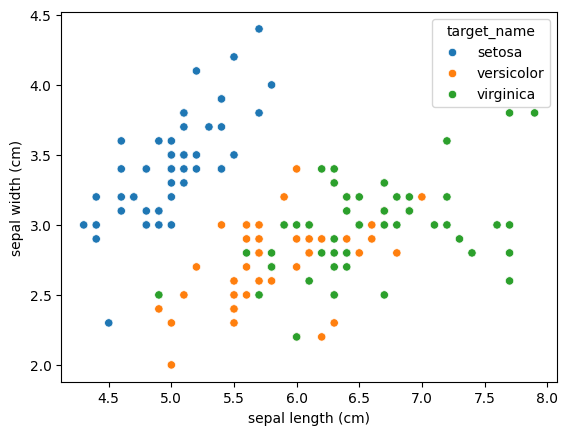

In [6]:
sns.scatterplot(df, x="sepal length (cm)", y="sepal width (cm)", hue="target_name")

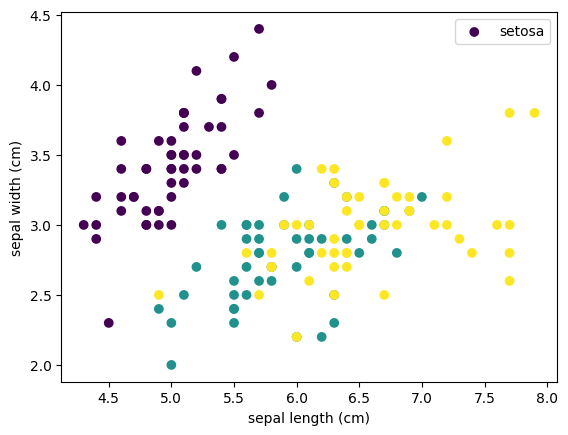

In [27]:
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'], c=df['target'])
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.legend(iris.target_names)
plt.show()

<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

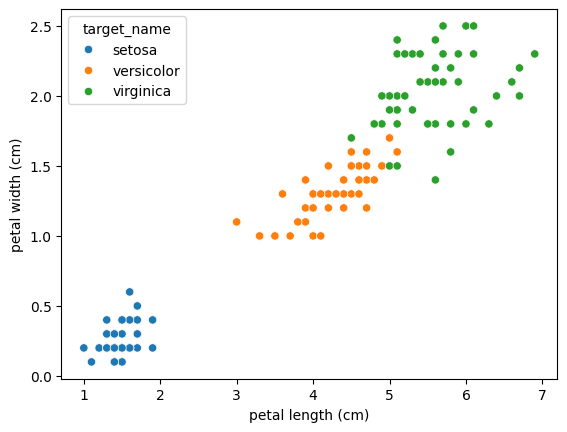

In [16]:
sns.scatterplot(df, x="petal length (cm)", y="petal width (cm)", hue="target_name")

In [17]:
X = df[["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]]
y = df["target"]
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [18]:
y[:4]

,target
0,0
1,0
2,0
3,0


### Train a Logistic Regression Model

In [20]:
from sklearn.linear_model import LogisticRegression

# Split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)

# Train logistic regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

### Model Evaluation: Accuracy

In [21]:
model.score(X_test, y_test)

0.9555555555555556

### Model Evaluation: Precision, Recall, F1-Score

In [22]:
y_pred = model.predict(X_test)
y_pred[:10]

array([0, 0, 2, 0, 0, 0, 0, 2, 2, 2])

In [23]:
y_test[:10].tolist()

[0, 0, 2, 0, 0, 0, 0, 2, 2, 2]

In [24]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.87      1.00      0.93        13
           2       1.00      0.87      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45



### Model Evaluation: Confusion Matrix

In [25]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

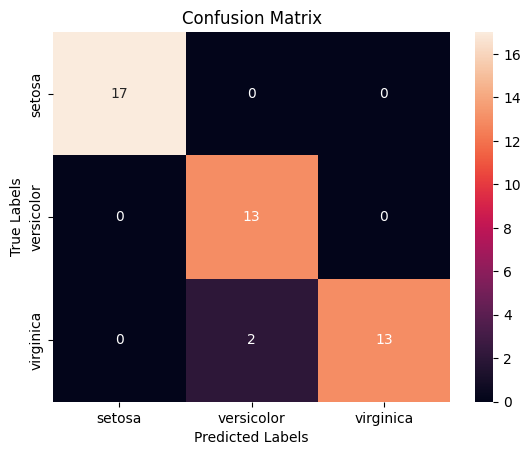

In [26]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()